In [6]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('S2_DataFile.csv')

In [27]:
df.head()

,Unnamed: 0,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME
0,0,BR0001,MOBILE,3020080,BOOKING ORDER,2019-01-12 01:11:00
1,1,BR0002,ATM,2001100,CASH TRANSACTIONS,2019-01-12 11:01:00
2,2,BR0004,MOBILE,2140140,BOOKING ORDER,2019-01-12 01:11:00
3,3,BR0002,INTERNET,4293000,FINANCIAL POSTING,2019-01-12 06:50:00
4,4,BR0003,MOBILE,3046430,BOOKING ORDER,2019-01-12 01:11:00


In [29]:
# Kiểm tra kiểu dữ liệu TRAN_TYPE
print(df['TRAN_TIME'].dtypes)

object


In [41]:
df['TRAN_TIME'] = pd.to_datetime(df['TRAN_TIME'],format='%Y/%m/%d %H:%M:%S')

In [42]:
print(df['TRAN_TIME'].dtypes)

datetime64[ns]


In [32]:
print(df['AMOUNT'].dtype)

int64


In [33]:
# Check dữ liệu cột AMOUNT
print(df['AMOUNT'].describe())

count    4.980000e+02
mean     3.547383e+06
std      1.605310e+07
min      1.000000e+01
25%      8.418000e+04
50%      1.006600e+06
75%      3.000000e+06
max      3.000000e+08
Name: AMOUNT, dtype: float64


In [34]:
mask = df['AMOUNT'] > 0
df = df[mask]

In [ ]:
df.to_csv('S2_DataFile.csv')

In [43]:
# Tạo thêm cột giờ
df['TRAN_HOUR'] = df['TRAN_TIME'].dt.strftime('%H')

In [ ]:
print(df[['TRAN_HOUR','TRAN_TIME']])

    TRAN_HOUR           TRAN_TIME
0          01 2019-01-12 01:11:00
1          11 2019-01-12 11:01:00
2          01 2019-01-12 01:11:00
3          06 2019-01-12 06:50:00
4          01 2019-01-12 01:11:00
..        ...                 ...
495        08 2019-01-12 08:45:00
496        21 2019-04-11 21:13:00
497        10 2019-01-12 10:53:00
498        08 2019-01-12 08:58:00
499        09 2019-01-12 09:13:00

[498 rows x 2 columns]


In [ ]:
# Tính tổng số tiền giao dịch
sum_ATM_byChannel = df.groupby(['CHANNEL_ID'])['AMOUNT'].sum().reset_index(name='SUM_AMT_BY_CHN')


In [ ]:
sum_ATM_byChannel

,CHANNEL_ID,SUM_AMT_BY_CHN
0,ATM,179502250
1,INTERNET,768629241
2,MOBILE,818465352


  CHANNEL_ID  SUM_AMT_BY_CHN
0        ATM       179502250
1   INTERNET       768629241
2     MOBILE       818465352
            SUM_AMT_BY_CHN
CHANNEL_ID                
ATM              179502250
INTERNET         768629241
MOBILE           818465352


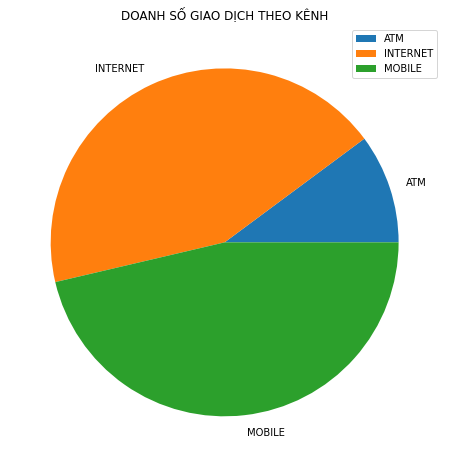

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Thực hiện group by channel và tính tổng số tiền giao dịch
sum_AMT_byChannel = df.groupby(['CHANNEL_ID'])['AMOUNT'].sum().reset_index(name='SUM_AMT_BY_CHN')
print(sum_AMT_byChannel)

df_plot = sum_AMT_byChannel
df_plot = df_plot.set_index('CHANNEL_ID')
print(df_plot)
plot = df_plot.plot.pie(y='SUM_AMT_BY_CHN',subplots=True, figsize=(8, 8))

# TRANG TRÍ VÀ HIEN THI BIEU DO
plt.title("DOANH SỐ GIAO DỊCH THEO KÊNH")
plt.ylabel("")
plt.show()




In [15]:
# Vẽ biểu đồ doanh số và số lượng
count_byChannel = df.groupby(['CHANNEL_ID']).size().reset_index(name='COUNTS')
count_byChannel

,CHANNEL_ID,COUNTS
0,ATM,98
1,INTERNET,72
2,MOBILE,328


In [16]:
df_plot2 = sum_AMT_byChannel.merge(count_byChannel, on=['CHANNEL_ID'])
df_plot2

,CHANNEL_ID,SUM_AMT_BY_CHN,COUNTS
0,ATM,179502250,98
1,INTERNET,768629241,72
2,MOBILE,818465352,328


In [17]:
df_plot2 = df_plot2.set_index('CHANNEL_ID')
df_plot2

,SUM_AMT_BY_CHN,COUNTS
CHANNEL_ID,,
ATM,179502250,98
INTERNET,768629241,72
MOBILE,818465352,328


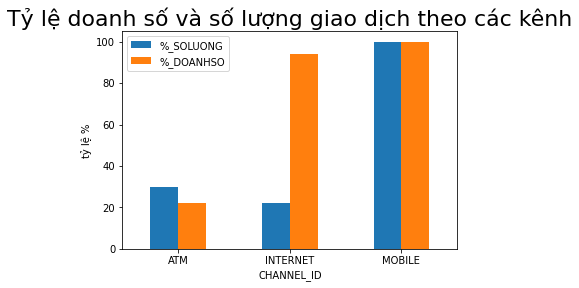

In [19]:
max_amt = df_plot2['SUM_AMT_BY_CHN'].max()
df_plot2['%_DOANHSO'] = df_plot2['SUM_AMT_BY_CHN']*100/sum_amt
max_count = df_plot2['COUNTS'].max()
df_plot2['%_SOLUONG'] = df_plot2['COUNTS']*100 / sum_count
df_plot2

df_plot2.plot.bar(y=['%_SOLUONG','%_DOANHSO'])
plt.title("Tỷ lệ doanh số và số lượng giao dịch theo các kênh", fontsize = 22)
plt.ylabel('tỷ lệ %')
plt.xticks(rotation=0)

plt.show()

In [45]:
# Vẽ biểu đồ lưu lượng giao dịch các kênh trung bình theo giờ trong ngày

number_of_days = (df['TRAN_TIME'].max().date() - df['TRAN_TIME'].min().date()).days
number_of_days

89

In [46]:
df = df[['CHANNEL_ID','TRAN_HOUR']]
df

,CHANNEL_ID,TRAN_HOUR
0,MOBILE,01
1,ATM,11
2,MOBILE,01
3,INTERNET,06
4,MOBILE,01
...,...,...
493,ATM,08
494,MOBILE,21
495,MOBILE,10
496,INTERNET,08


In [47]:
count_by_CNNTime = df.groupby(['CHANNEL_ID','TRAN_HOUR']).size().reset_index(name='COUNTS_CNNTIME')
count_by_CNNTime


,CHANNEL_ID,TRAN_HOUR,COUNTS_CNNTIME
0,ATM,06,17
1,ATM,07,9
2,ATM,08,19
3,ATM,09,6
4,ATM,10,19
5,ATM,11,10
6,ATM,12,2
7,ATM,13,6
8,ATM,14,3
9,ATM,21,7


In [49]:
# Áp dung pivot table để xoay dữ liệu
df_plot3 = pd.pivot_table(count_by_CNNTime, values='COUNTS_CNNTIME', index=['TRAN_HOUR'], columns=['CHANNEL_ID'])
df_plot3

CHANNEL_ID,ATM,INTERNET,MOBILE
TRAN_HOUR,,,
00,NaN,1.0,1.0
01,NaN,3.0,194.0
02,NaN,NaN,1.0
04,NaN,NaN,1.0
06,17.0,3.0,4.0
07,9.0,3.0,4.0
08,19.0,7.0,19.0
09,6.0,9.0,18.0
10,19.0,6.0,18.0


In [51]:
# Xử lý NaN
df_plot3['ATM'] = df_plot3['ATM'].fillna(0)
df_plot3['INTERNET'] = df_plot3['INTERNET'].fillna(0)
df_plot3['MOBILE'] = df_plot3['MOBILE'].fillna(0)

In [52]:
# Tính giá trị trung bình theo ngày
df_plot3['ATM'] = df_plot3['ATM']/number_of_days
df_plot3['INTERNET'] = df_plot3['INTERNET']/number_of_days
df_plot3['MOBILE'] = df_plot3['MOBILE']/number_of_days

Text(0.5, 0, 'Giờ giao dịch')

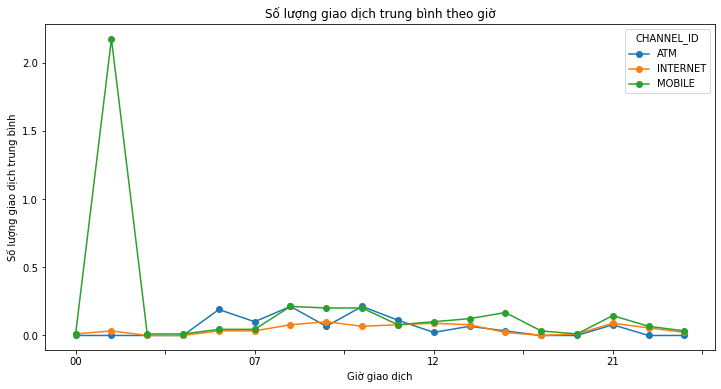

In [53]:
# Vẽ biểu đồ
df_plot3.plot(y=['ATM','INTERNET','MOBILE'],figsize=(12,6),marker = "o")
plt.title('Số lượng giao dịch trung bình theo giờ')
plt.ylabel('Số lượng giao dịch trung bình')
plt.xlabel('Giờ giao dịch')

## KẾT LUẬN ##

- Dữ liệu nguồn có lỗi, cân nhắc về việc thay đổi nguồn dữ liệu.
- Khách hàng sử dụng Mobile và Internet Banking để giao dịch nhiều hơn đáng kể so với ATM
- Tuy số lượt giao dịch trên Mobile nhiều gần gấp 4 lần với Internet Banking nhưng số tiền giao dịch ở hai kênh này tương đương nhau. Dường như với những khoản giao dịch giá trị lớn khách hàng thường lựa chọn Internet Banking.
- Các giao dịch Mobile nhiều nhất về đêm, các giao dịch Internet Banking tập trung nhiều trong giờ hành chính, giao dịch ATM vào buổi sáng nhiều hơn.